## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB', 'BP']
pf_data = pd.read_csv('WMT_FB_BP_2014_2017.csv', index_col='Date')

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.25071533, 0.39342181, 0.35586287])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [8]:
np.sum(weights * log_returns.mean()) * 250

0.14244579281799957

Expected Portfolio Variance:

In [9]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.027140710518136206

Expected Portfolio Volatility:

In [10]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16474437932183364

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [11]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [12]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.126944368722119,
  0.12925835546690906,
  0.08276755045761813,
  0.12138992301287883,
  0.12956463351131625,
  0.13706606844503788,
  0.06944185839037816,
  0.12544887486467046,
  0.16061227057564595,
  0.10133920826860056,
  0.13189414675364589,
  0.10683051697662828,
  0.21527111746558433,
  0.11274566927695659,
  0.0473256111003481,
  0.06709105075876774,
  0.05908519636326394,
  0.1462690104967227,
  0.05891685284097637,
  0.06945544117733472,
  0.1627447645329744,
  0.1762453468492487,
  0.11941460781785337,
  0.14897236863615665,
  0.14490210102340403,
  0.13066442617283222,
  0.13804661902195298,
  0.14716566656734806,
  0.10833314304202235,
  0.08991024869969748,
  0.1446083483664484,
  0.17050426768783214,
  0.1909101458112721,
  0.1396190373453504,
  0.11627877900722304,
  0.17632191206887946,
  0.15728543654506316,
  0.1320202618250406,
  0.16226306148635705,
  0.14256318244457455,
  0.16761004027224746,
  0.13312675231201937,
  0.1726173176926433,
  0.16605737456162153,

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [13]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.12694437, 0.12925836, 0.08276755, 0.12138992, 0.12956463,
        0.13706607, 0.06944186, 0.12544887, 0.16061227, 0.10133921,
        0.13189415, 0.10683052, 0.21527112, 0.11274567, 0.04732561,
        0.06709105, 0.0590852 , 0.14626901, 0.05891685, 0.06945544,
        0.16274476, 0.17624535, 0.11941461, 0.14897237, 0.1449021 ,
        0.13066443, 0.13804662, 0.14716567, 0.10833314, 0.08991025,
        0.14460835, 0.17050427, 0.19091015, 0.13961904, 0.11627878,
        0.17632191, 0.15728544, 0.13202026, 0.16226306, 0.14256318,
        0.16761004, 0.13312675, 0.17261732, 0.16605737, 0.17574589,
        0.13750745, 0.08083799, 0.15355508, 0.13475029, 0.10918309,
        0.12922158, 0.04003524, 0.10435392, 0.10718089, 0.09324016,
        0.11882203, 0.11844675, 0.1229199 , 0.05722196, 0.16305516,
        0.16332978, 0.10355842, 0.12292402, 0.16153542, 0.13596664,
        0.04560318, 0.14199444, 0.1349035 , 0.1409189 , 0.13697317,
        0.15531466, 0.08975756, 0.17265161, 0.21

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [16]:
portfolios = pd.DataFrame({
    'Return': pf_returns,
    'Volatility': pf_volatilities
})

Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

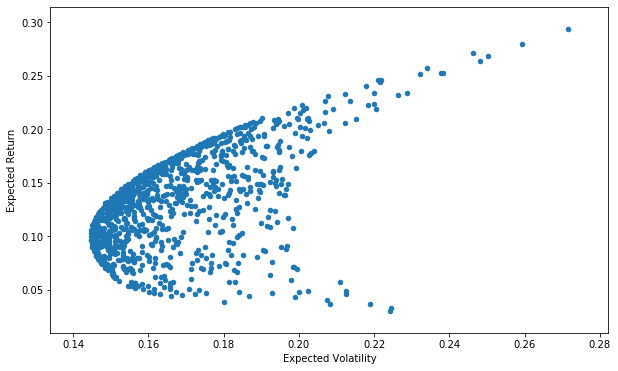

In [17]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


Expected Portfolio Return:

Expected Portfolio Variance:

Expected Portfolio Volatility:

*****

Text(0, 0.5, 'Expected Return')

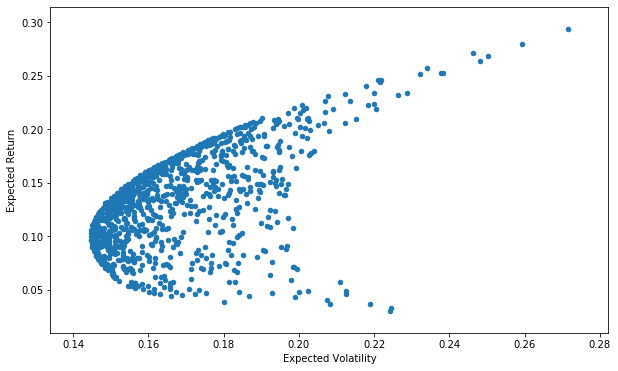

In [18]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')